# TSF Data Science & Business Analytics Task - 2

## Prediction using Unsupervised Machine Learning.

## From the given "Iris" Dataset, predict the optimum number of clusters and represet it visually.

### Lets import required libraries to read, prepare and clean the data.

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [114]:
data_iris = pd.read_csv(r'C:\Users\Danish\OneDrive\Desktop\Internship\Grip Projects\Unsupervised ML\iris.csv')

In [115]:
data_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [116]:
#checking for 1st five rows.
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

## Checking and cleaning the data if required. 

In [117]:
data_iris.shape

(150, 6)

In [118]:
data.head(8)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa


In [119]:
#As we can see that "Id" column is of no use here so, we will remove it.

In [120]:
data_iris.drop("Id", axis = 1, inplace = True)

In [121]:
#cheking the data again
data_iris.head(8)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa


## Checking for missing value & Missing Value Treatment

In [122]:
data_iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### No null data is found in tha dataset so we dont need to replace or remove them.

## Checking for Duplicate Value and Removing them If found.  

In [124]:
data_iris.duplicated().sum()

3

In [126]:
# 3 duplicate values exist, so remove them
iris_dataset=data_iris.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
iris_dataset.shape

(147, 5)

In [127]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [128]:
iris_dataset.size

735

In [129]:
iris_dataset.shape

(147, 5)

In [53]:
# Describing the Dataset - i.e. overall count, mean, standard deviation, minimum, 25%, 50%, 75% and max of data values
data_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization

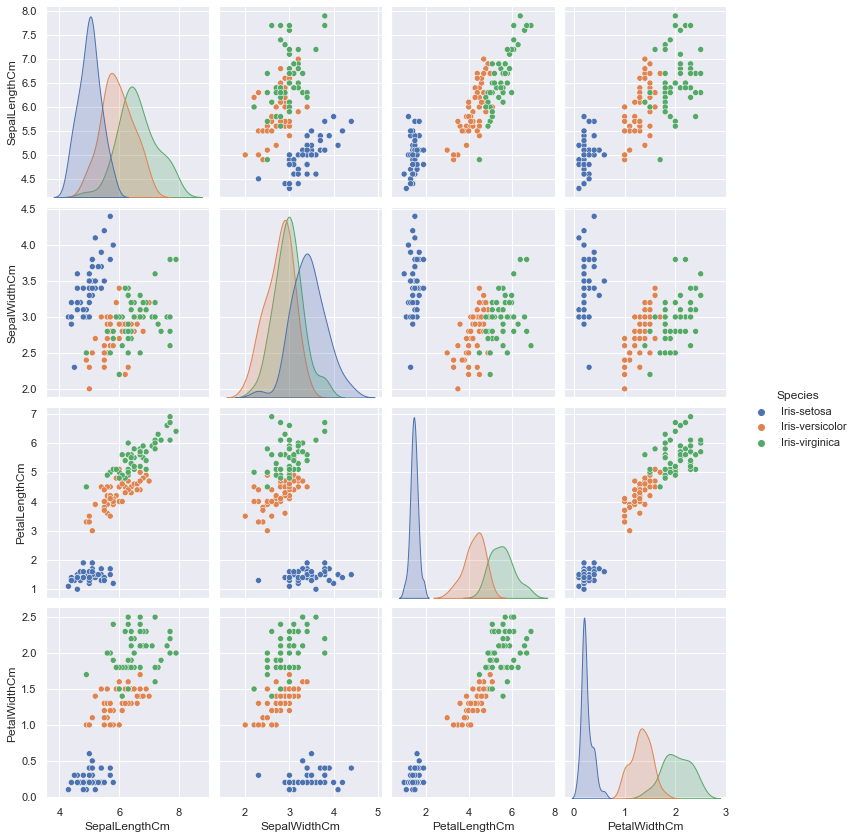

In [130]:
#sns.set(rc={'figure.figsize':(28,28)})
#plt.rcParams['figure.figsize']=20,20
#sns.pairplot(data=data_iris, kind = 'strip',hue= "Species")
#sns.pairplot(data=data_iris, kind = 'reg',hue= "Species")
g = sns.pairplot(data=iris_dataset,hue= "Species")
g.fig.set_size_inches(12,12)
plt.show()

In [87]:
#It is clear from the above plots that iris-satosa can be distinguished better.

## Finding Optimum Number of Clusters. Optimum means most conducive to a favourable outcome; best.


### ELBOW METHOD -   In this method the sum of squares at each number of clusters is calculated and graphed, and the user looks for a change of slope from steep to shallow (an elbow) to determine the optimal number of clusters. We can also use other methods like "The Silhouette Method" or "The sum of Squares Method" as well.

In [132]:
x = iris_dataset.iloc[:,:-1].values
#x= data_iris.iloc[:, [0, 1, 2, 3]].values

In [133]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [5. , 3

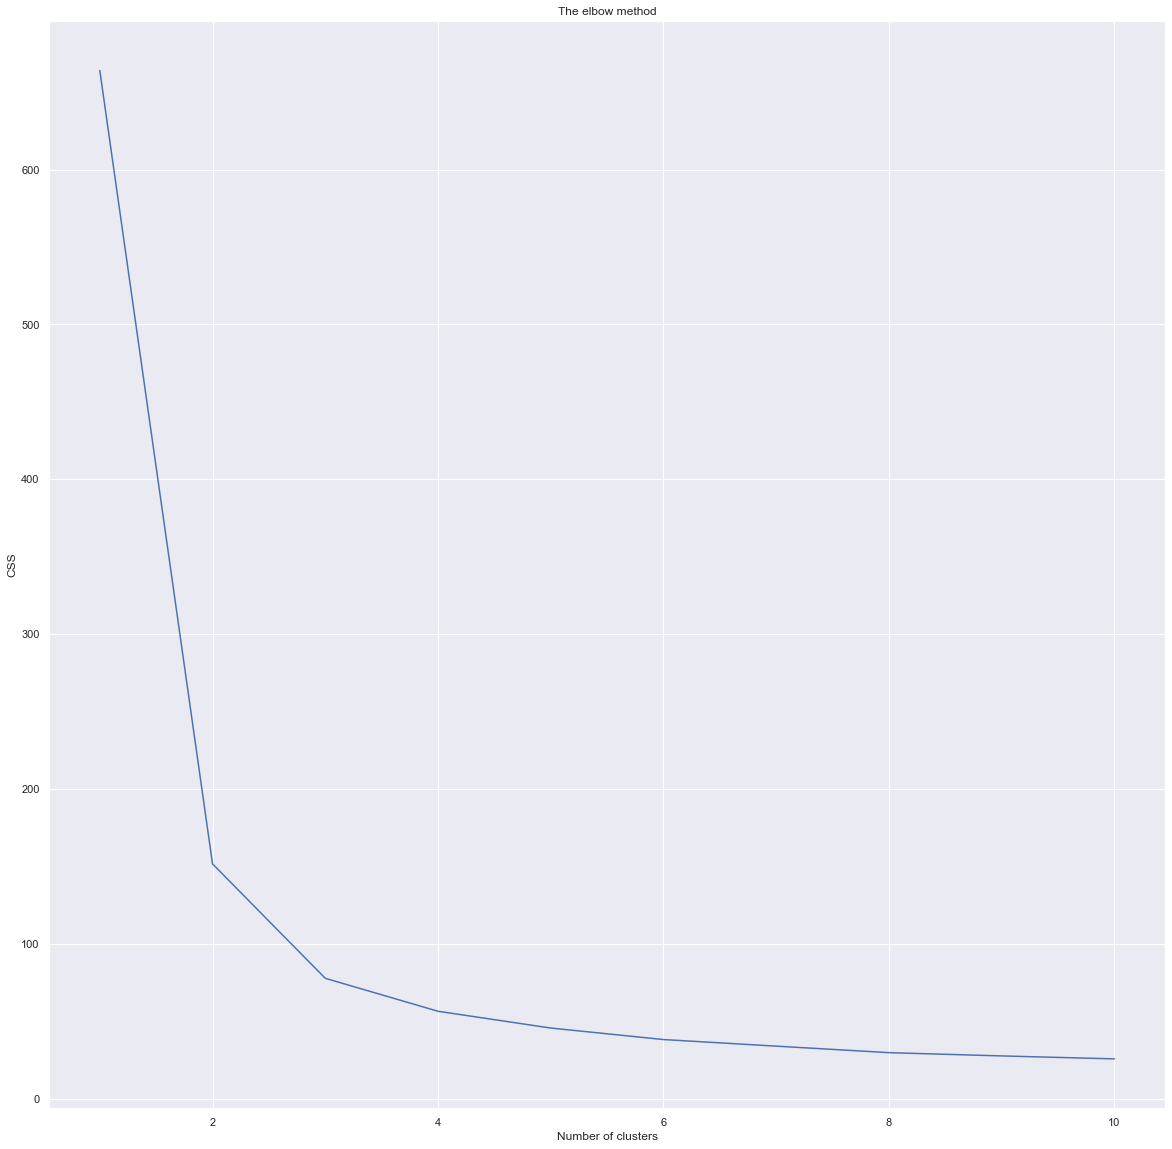

In [134]:
css=[]
k_rnge = range(1,11)
for k in k_rnge:
    kmeans = KMeans(n_clusters = k, init = 'k-means++',max_iter = 320, n_init = 10, random_state = 0)
    kmeans.fit(x)
    css.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), css)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CSS') # Within cluster sum of squares
plt.show()


### We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (CSS) doesn't decrease significantly with every iteration.

### From this we choose the number of clusters as 3. 

# Applying kmeans to the dataset / Creating the kmeans classifier

In [135]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 320, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualization the clusters - - On the first two columns (sepal length and sepal width)

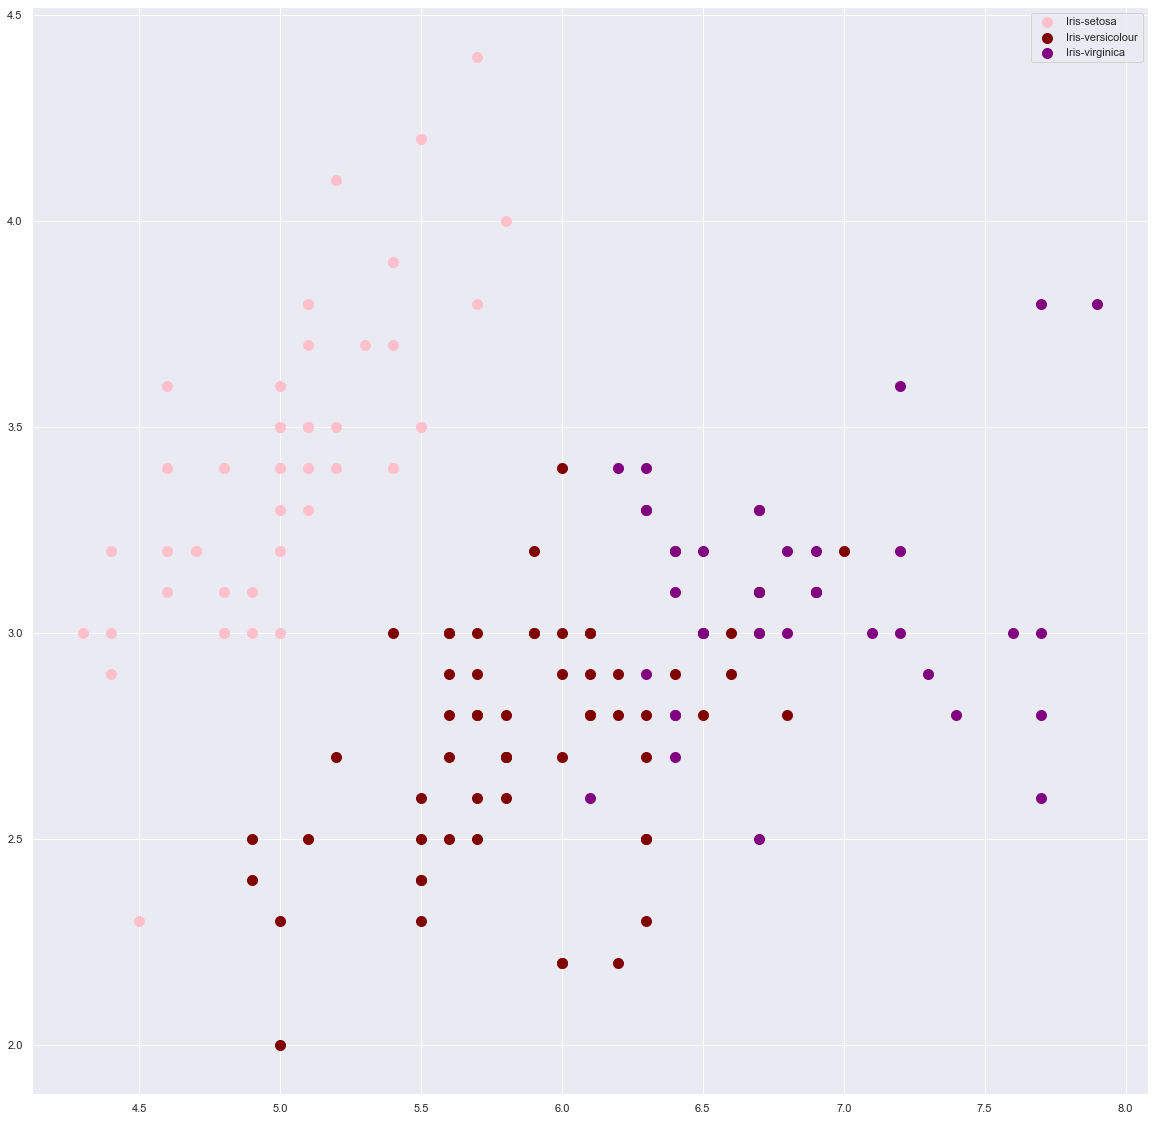

In [136]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'maroon', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'purple', label = 'Iris-virginica')

plt.legend()
plt.show()


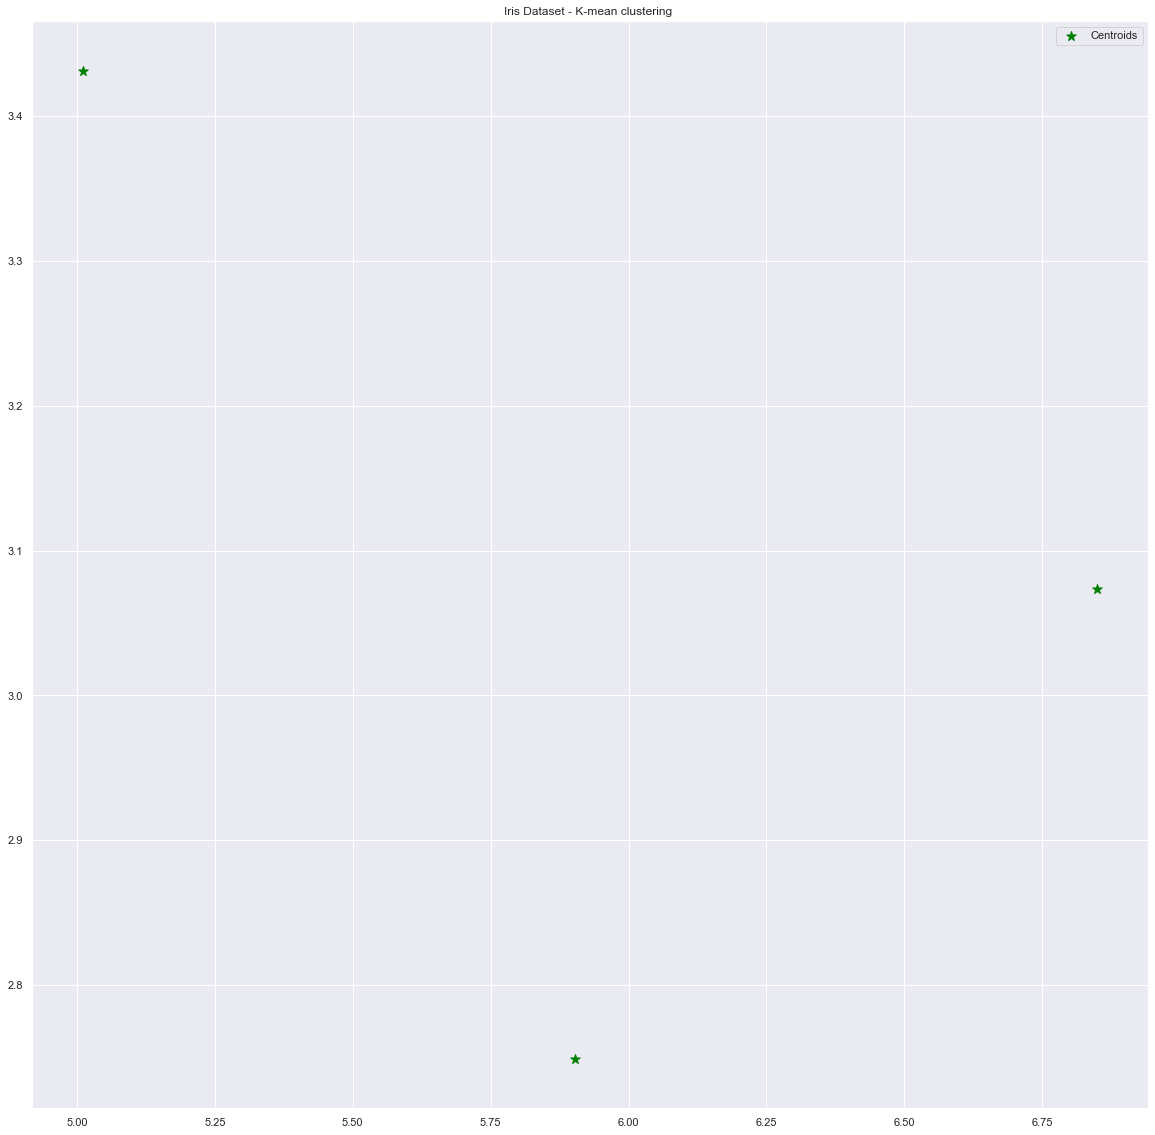

In [137]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'green', marker='*',  label = 'Centroids')
plt.title("Iris Dataset - K-mean clustering ")
plt.legend()
plt.show()

# Thank you.